<a href="https://colab.research.google.com/github/mrmm2703/first-cnn/blob/master/Sign%20Language%20MNIST%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the modules

First thing to do is to import the required models to build this classification model:
*   `csv`: For manipulating the datasets
*   `tensorflow`: Of course
*   `keras`: Access a high-level API for TensorFlow
*   `pyplot`: To visualise the data
*   `numpy`: For number operations and arrays

In [ ]:
import csv
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Preparing the data

## Import the dataset

The dataset firstly needs to be uploaded into the Colab environment. We begin by authorising Colab access to our Google Drive folder where the files are stored.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now we can open up any files from our Google Drive account. Here we set the locations of the train and test csv files inside My Drive.

In [ ]:
train_drive_location = "/content/drive/My Drive/Colab/Sign Language MNIST Image Classification/sign_mnist_train.csv"
test_drive_location = "/content/drive/My Drive/Colab/Sign Language MNIST Image Classification/sign_mnist_test.csv"

Now we need to work on the dataset. So far, we just have plain data, but we need to convert this data into readable data for the model using numpy arrays. So let's go and create a 3D array to hold these values from the csv. In the end, we want 4 arrays.

In [ ]:
train_images = np.zeros((27455, 28, 28))
train_labels = np.zeros(27455)
test_images = np.zeros((7172, 28, 28))
test_labels = np.zeros(7172)

Now we want to populate our training data. Let's do this by opening the dataset using a csv.reader and then populating our three-dimensional numpy arrays with this data.

In [ ]:
with open(train_drive_location, "r") as train_file:
  reader = csv.reader(train_file)
  for i_case, case in enumerate(reader):
    if i_case == 0:
      continue
    index_case = i_case - 1
    x = 0
    y = 0
    for i_col, col in enumerate(case):
      if i_col == 0:
        train_labels[index_case] = int(col)
        continue
      index_col = i_col - 1
      train_images[index_case][y][x] = int(col)
      x += 1
      if (index_col + 1) % 28 == 0:
        y += 1
        x = 0

Now we do the same thing for our test data.

In [ ]:
with open(test_drive_location, "r") as test_file:
  reader = csv.reader(test_file)
  for i_case, case in enumerate(reader):
    if i_case == 0:
      continue
    index_case = i_case - 1
    x = 0
    y = 0
    for i_col, col in enumerate(case):
      if i_col == 0:
        test_labels[index_case] = int(col)
        continue
      index_col = i_col - 1
      test_images[index_case][y][x] = int(col)
      x += 1
      if (index_col + 1) % 28 == 0:
        y += 1
        x = 0

Finally we add a list to store our class names.

In [ ]:
class_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

## Preprocess the data

As is, the data is an usable state. The pixel values go from 0 to 255, which will not work with training the model. Let's scale down these values into a 0 to 1 range.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Now let's have a look at some of these images using pylot.

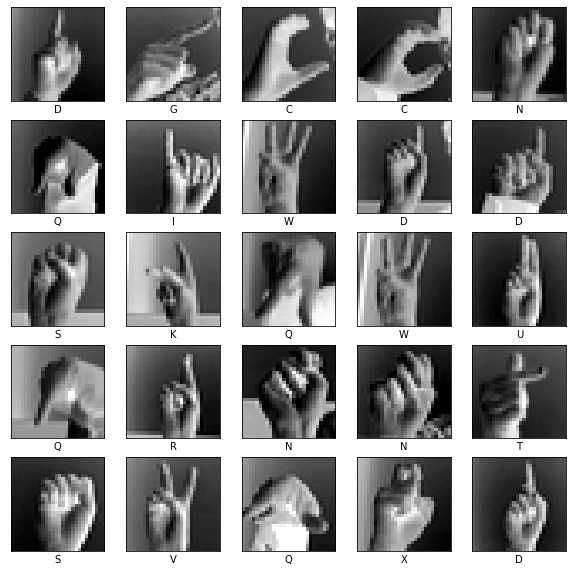

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[int(train_labels[i])])
plt.show()

# Building the model

## Setting up the layers

Let's start building the foundations of our neural network by adding in layers. For this, let's use a Flatten layer to reshape our input data and then use two Dense layers to build our neural network.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(25)
])

## Compile the model

Now let's begin to compile our model. We'll use the Adam algorithm optimizer and Accuracy as the metric and use SparseCategoricalCrossentropy for calculating loss.

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model

## Feed the model

Let's begin the initial training by using the `fit` function.

In [ ]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
858/858 [==============================] - 2s 2ms/step - loss: 2.1416 - accuracy: 0.3782
Epoch 2/15
858/858 [==============================] - 2s 2ms/step - loss: 1.2402 - accuracy: 0.6344
Epoch 3/15
858/858 [==============================] - 2s 2ms/step - loss: 0.9489 - accuracy: 0.7183
Epoch 4/15
858/858 [==============================] - 2s 2ms/step - loss: 0.7655 - accuracy: 0.7757
Epoch 5/15
858/858 [==============================] - 2s 2ms/step - loss: 0.6321 - accuracy: 0.8191
Epoch 6/15
858/858 [==============================] - 2s 2ms/step - loss: 0.5276 - accuracy: 0.8539
Epoch 7/15
858/858 [==============================] - 2s 2ms/step - loss: 0.4472 - accuracy: 0.8763
Epoch 8/15
858/858 [==============================] - 2s 2ms/step - loss: 0.3840 - accuracy: 0.8945
Epoch 9/15
858/858 [==============================] - 2s 2ms/step - loss: 0.3205 - accuracy: 0.9166
Epoch 10/15
858/858 [==============================] - 2s 2ms/step - loss: 0.2646 - accuracy: 0.9332

## Evaluate accuracy

Now let's evaluate the model's accuracy using the `evaluate` method against our test dataset.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

225/225 - 0s - loss: 1.2759 - accuracy: 0.6845


## Make predictions

Now we've got a model, let's create a probability model to make some predictions.

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

Now let's store these predictions in an array.

In [ ]:
predictions = probability_model.predict(test_images)

Now that we got these predictions, let's visualise all of this.

## Verify predictions

Let's create a couple of functions to help us which us pyplot to display this data.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, int(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, int(true_label[i])
  plt.grid(False)
  plt.xticks(range(25))
  plt.yticks([])
  thisplot = plt.bar(range(25), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("green")

Let's quickly check out a few random predictions from the model.

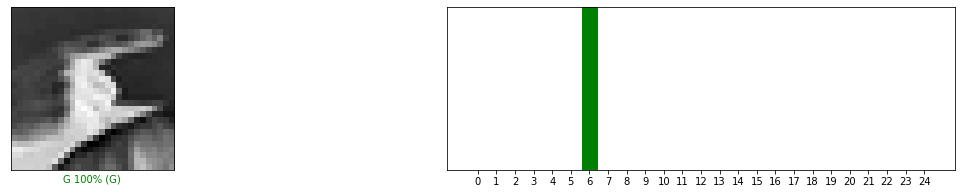

In [ ]:
i = 0

plt.figure(figsize=(20, 3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

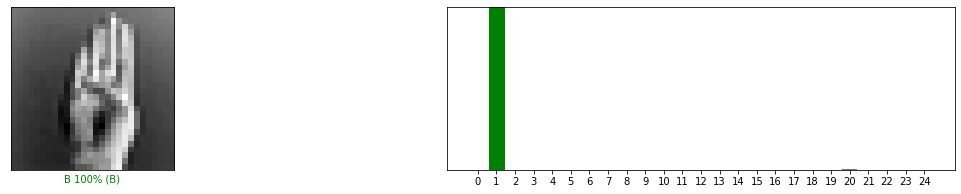

In [ ]:
i = 432

plt.figure(figsize=(20, 3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

Ok, now that the small-scale individual tests are done, let's go for a large-scale test to visualise the predictions.

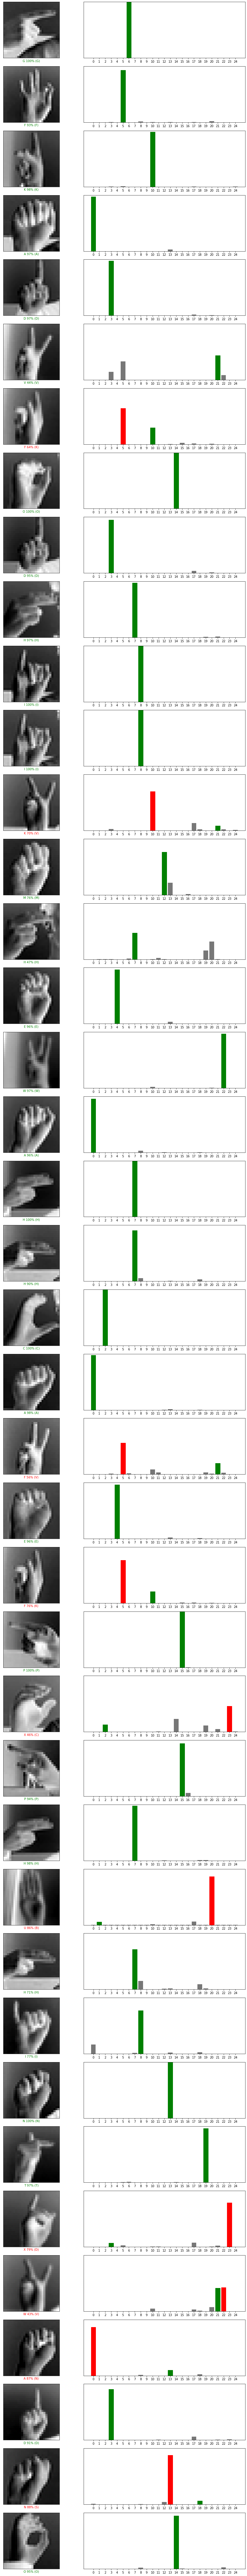

In [ ]:
num_rows = 40
num_cols = 1
num_img = num_rows * num_cols
plt.figure(figsize=(2*7*num_cols, 3*num_rows))
for i in range(num_img):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()